## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
from keras.models import load_model

# # Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
  
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
T_or_F = [True,False]

In [8]:
from keras.callbacks import ModelCheckpoint

results = {}

for t_or_f in T_or_F:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with save_best_only = %s" % (t_or_f))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(filepath="./Day_86.h5", 
                             monitor="val_loss", 
                             save_best_only=t_or_f,
                             save_weights_only=True)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Save_best_only--%s" % (t_or_f)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with save_best_only = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3

50000/50000 [==============================] - 2s 47us/step - loss: 0.5555 - accuracy: 0.8369 - val_loss: 1.6558 - val_accuracy: 0.4851
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5390 - accuracy: 0.8427 - val_loss: 1.6508 - val_accuracy: 0.4903
Epoch 48/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5218 - accuracy: 0.8511 - val_loss: 1.6563 - val_accuracy: 0.4872
Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5057 - accuracy: 0.8573 - val_loss: 1.6734 - val_accuracy: 0.4908
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.4911 - accuracy: 0.8623 - val_loss: 1.6867 - val_accuracy: 0.4843
Experiment with save_best_only = False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________

50000/50000 [==============================] - 2s 47us/step - loss: 0.6442 - accuracy: 0.8035 - val_loss: 1.5665 - val_accuracy: 0.5001
Epoch 42/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.6253 - accuracy: 0.8094 - val_loss: 1.5745 - val_accuracy: 0.4998
Epoch 43/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.6094 - accuracy: 0.8161 - val_loss: 1.6016 - val_accuracy: 0.4954
Epoch 44/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5900 - accuracy: 0.8239 - val_loss: 1.5905 - val_accuracy: 0.4986
Epoch 45/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5734 - accuracy: 0.8291 - val_loss: 1.6099 - val_accuracy: 0.4927
Epoch 46/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5551 - accuracy: 0.8392 - val_loss: 1.6107 - val_accuracy: 0.4997
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.5383 - accuracy: 0.8432 - val_loss: 1.6199

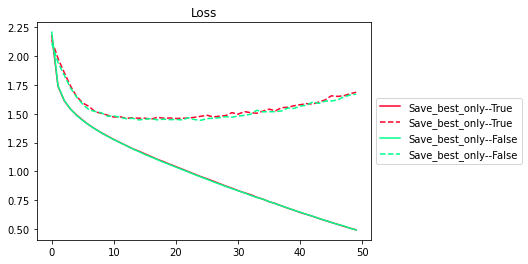

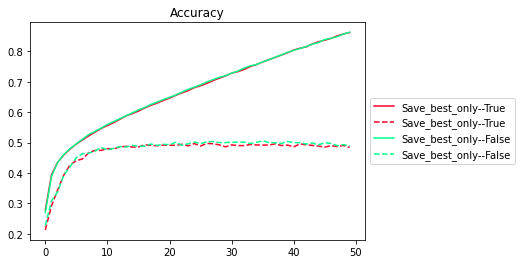

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(6,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(6,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
# Reload the model weights

model = build_mlp(input_shape=x_train.shape[1:])
try:
    model.load_weights('./Day_86.h5')
    print("Model loading successful!")
except :    
    print("Model loading failed!")
    
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
print("Test loss: %.6f" %(loss_loadback))
print("Test accuracy: %.6f" %(acc_loadback))

Model loading successful!
10000/10000 [==============================] - 1s 56us/step
Test loss: 1.670432
Test accuracy: 0.489700
